### Geopandas Demonstration

Identifying the Location of Maximum Geopotential Height during Atmospheric Blocking Event Using Geopandas

### Requirements ID Number: GPD.1

#### As a developer, I want to identify the location of the highest geopotential height within our geographical study boundaries to track the movement over time of the "center" of the high pressure system.

#### Acceptance Criteria

1. Must use geopotential height data in a NetCDF file
2. Data must include Latitudes and longitudes
3. Must calculate geopotential height from the geopotential variable in ERA5
4. Code must identify the maximum geopotential height and the corresponding lat/lon pair at the max point
5. A Geo DataFrame must be created with the lat/lon and geopotential height value
6. Outputted GeoDataFrame must be a point

#### Research 

1. Determine how to find the maximum value in the dataset and find its location
2. Further research and tweaking to this example is necessary!!!

### Below is a demonstration of fulfilling the acceptance critera

In [18]:
# all examples should figure out examples, write code, create more requirements for individual requirements; tests functions to make its own requirements

## Import packages needed for analysis

In [77]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt

# Load netCDF4 data for a given blocking event

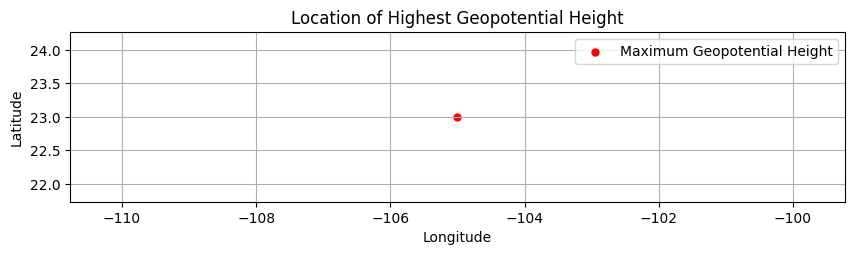

In [91]:
data = xr.open_dataset('8cbccc6f57bac9ec68c2fbf3998150b7.nc')
g = 9.80665  # m/s^2
geopot_hgt = data['z']/g  # m

# find max geopotential height of dataset
max_geopot_hgt_value = np.max(geopot_hgt.values)
# returns index with the lat/lon location
max_geopot_hgt_index = np.unravel_index(np.argmax(geopot_hgt.values), geopot_hgt.shape)

# get the lat and lon data corresponding with the max geopotential height value
lat = data['latitude'].values[max_geopot_hgt_idx[2]] 
lon = data['longitude'].values[max_geopot_hgt_idx[3]]

# create Geo DataFrame with the max geopotential height value and the lat lon point where it occurred, with 
geo_df = gpd.GeoDataFrame(
    {'geopotential_height': [max_geopot_hgt_value]},
    geometry=[Point(lon, lat)],
    crs="EPSG:32633"
)

# plot the point on the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='red', markersize=25, label="Maximum Geopotential Height")
ax.set_title('Location of Highest Geopotential Height')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid()
ax.legend()

plt.show()